In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict,Counter
from random import sample
from sklearn import datasets
from sklearn.model_selection import train_test_split
import NeuralNet as nn

## Hand-Written Digits Dataset

**Models Used:**
- Neural Networks
- KNN

### 1. Neural Network

In [2]:
digits = datasets.load_digits(as_frame=True)
dig_df = digits['data']
dig_df['class'] = digits['target']
dig_df.insert(0,'bias',1)

#split data by class into k groups the combine into folds
k = 10
dig_class_0 = dig_df.loc[dig_df['class'] == 0].sample(frac=1)
dig_class_0['class'] = [[1,0,0,0,0,0,0,0,0,0]] * len(dig_class_0)
dg0_split =  np.array_split(dig_class_0,k)
dig_class_1 = dig_df.loc[dig_df['class'] == 1].sample(frac=1)
dig_class_1['class'] = [[0,1,0,0,0,0,0,0,0,0]] * len(dig_class_1)
dg1_split =  np.array_split(dig_class_1,k)
dig_class_2 = dig_df.loc[dig_df['class'] == 2].sample(frac=1)
dig_class_2['class'] = [[0,0,1,0,0,0,0,0,0,0]] * len(dig_class_2)
dg2_split =  np.array_split(dig_class_2,k)
dig_class_3 = dig_df.loc[dig_df['class'] == 3].sample(frac=1)
dig_class_3['class'] = [[0,0,0,1,0,0,0,0,0,0]] * len(dig_class_3)
dg3_split =  np.array_split(dig_class_3,k)
dig_class_4 = dig_df.loc[dig_df['class'] == 4].sample(frac=1)
dig_class_4['class'] = [[0,0,0,0,1,0,0,0,0,0]] * len(dig_class_4)
dg4_split =  np.array_split(dig_class_4,k)
dig_class_5 = dig_df.loc[dig_df['class'] == 5].sample(frac=1)
dig_class_5['class'] = [[0,0,0,0,0,1,0,0,0,0]] * len(dig_class_5)
dg5_split =  np.array_split(dig_class_5,k)
dig_class_6 = dig_df.loc[dig_df['class'] == 6].sample(frac=1)
dig_class_6['class'] = [[0,0,0,0,0,0,1,0,0,0]] * len(dig_class_6)
dg6_split =  np.array_split(dig_class_6,k)
dig_class_7 = dig_df.loc[dig_df['class'] == 7].sample(frac=1)
dig_class_7['class'] = [[0,0,0,0,0,0,0,1,0,0]] * len(dig_class_7)
dg7_split =  np.array_split(dig_class_7,k)
dig_class_8 = dig_df.loc[dig_df['class'] == 8].sample(frac=1)
dig_class_8['class'] = [[0,0,0,0,0,0,0,0,1,0]] * len(dig_class_8)
dg8_split =  np.array_split(dig_class_8,k)
dig_class_9 = dig_df.loc[dig_df['class'] == 9].sample(frac=1)
dig_class_9['class'] = [[0,0,0,0,0,0,0,0,0,1]] * len(dig_class_9)
dg9_split =  np.array_split(dig_class_9,k)
dig_vals = [[1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,1]]

#list to hold folds
dig_fold = []
for i in range(k):
    this_fold = [dg0_split[i],dg1_split[i],dg2_split[i],dg3_split[i],dg4_split[i],dg5_split[i],dg6_split[i],dg7_split[i],dg8_split[i],dg9_split[i]]
    dig_fold.append(pd.concat(this_fold))

#dig_nn_arc = [[64,64,10],[64,128,10],[64,64,128,10],[64,32,64,10],[64,64,32,64,10],[64,64,128,128,64,10]]
dig_nn_arc = [[64,64,10],[64,128,10]]

def dig_test(lamb,eps,alpha,batch_size):
    dig_res = nn.k_fold(dig_fold,dig_vals,dig_nn_arc,lamb,eps,alpha,batch_size)
    arc_dict = defaultdict(list)
    print(f'lamb = {lamb} eps = {eps} alpha = {alpha} batch_size = {batch_size}')

    for arc,perf in dig_res.items():
        avg_acc,avg_f1 = [0,0]
        for res in perf:
            avg_acc += res[0]
            avg_f1 += res[1]
        arc_dict['Architecture'].append(arc)
        arc_dict['Accuracy'].append(avg_acc/10)
        arc_dict['F1'].append(avg_f1/10)

    arc_table = pd.DataFrame(arc_dict)
    print(arc_table)

**1.3** To obtain the best performance possible, you should carefully adjust the hyper-parameters of each
algorithm when deployed on a dataset

In [27]:
hyper_params = [[0.4,0.01,5,50],[0.6,0.01,5,50],[0.4,0.001,5,50],[0.6,0.001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.4 eps = 0.01 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.955459  0.955166
1  [64, 128, 10]  0.958234  0.957735
lamb = 0.6 eps = 0.01 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.958786  0.959035
1  [64, 128, 10]  0.964924  0.964825
lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.964949  0.965058
1  [64, 128, 10]  0.967716  0.967639
lamb = 0.6 eps = 0.001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0   [64, 64, 10]  0.964918  0.964842
1  [64, 128, 10]  0.968833  0.968655


In [28]:
dig_nn_arc = [[64,64,10],[64,128,10],[64,64,128,10],[64,32,64,10]]
hyper_params = [[0.2,0.001,5,50],[0.4,0.001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.001 alpha = 5 batch_size = 50
        Architecture  Accuracy        F1
0       [64, 64, 10]  0.965455  0.965219
1      [64, 128, 10]  0.972150  0.972106
2  [64, 64, 128, 10]  0.962743  0.962414
3   [64, 32, 64, 10]  0.946058  0.945727
lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
        Architecture  Accuracy        F1
0       [64, 64, 10]  0.957652  0.957369
1      [64, 128, 10]  0.972685  0.972667
2  [64, 64, 128, 10]  0.959403  0.959354
3   [64, 32, 64, 10]  0.945982  0.945710


In [3]:
dig_nn_arc = [[64,128,10],[64,128,128,10]]
hyper_params = [[0.2,0.0001,7,50],[0.2,0.0001,10,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.0001 alpha = 7 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.966064  0.965883
1  [64, 128, 128, 10]  0.972193  0.972465
lamb = 0.2 eps = 0.0001 alpha = 10 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.966079  0.965760
1  [64, 128, 128, 10]  0.961644  0.961582


In [31]:
dig_nn_arc = [[64,64,10],[64,128,10],[64,128,128,10],[64,64,128,64,10]]
hyper_params = [[0.2,0.0001,5,50],[0.2,0.0001,7,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.2 eps = 0.0001 alpha = 5 batch_size = 50
            Architecture  Accuracy        F1
0           [64, 64, 10]  0.959416  0.959145
1          [64, 128, 10]  0.969383  0.969181
2     [64, 128, 128, 10]  0.972754  0.972740
3  [64, 64, 128, 64, 10]  0.963294  0.963047
lamb = 0.2 eps = 0.0001 alpha = 7 batch_size = 50
            Architecture  Accuracy        F1
0           [64, 64, 10]  0.957667  0.957718
1          [64, 128, 10]  0.972792  0.972715
2     [64, 128, 128, 10]  0.970452  0.970365
3  [64, 64, 128, 64, 10]  0.962088  0.961845


In [7]:
dig_nn_arc = [[64,128,10],[64,128,128,10]]
hyper_params = [[0.4,0.001,5,50],[0.4,0.001,7,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.4 eps = 0.001 alpha = 5 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.972705  0.972602
1  [64, 128, 128, 10]  0.967140  0.967031
lamb = 0.4 eps = 0.001 alpha = 7 batch_size = 50
         Architecture  Accuracy        F1
0       [64, 128, 10]  0.960403  0.960171
1  [64, 128, 128, 10]  0.963249  0.963181


In [143]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,7,50],[0.05,0.0001,7,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 7 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.970007  0.969877
lamb = 0.05 eps = 0.0001 alpha = 7 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]   0.97151  0.971131


In [144]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,5,50],[0.05,0.0001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy       F1
0  [64, 128, 10]  0.975509  0.97539
lamb = 0.05 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy       F1
0  [64, 128, 10]  0.963858  0.96357


In [146]:
dig_nn_arc = [[64,128,10]]
hyper_params = [[0.1,0.0001,3,50],[0.1,0.0001,5,50]]
for params in hyper_params:
    dig_test(params[0],params[1],params[2],params[3])

lamb = 0.1 eps = 0.0001 alpha = 3 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.973884  0.973724
lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50
    Architecture  Accuracy        F1
0  [64, 128, 10]  0.970489  0.970409


**1.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using lamb = 0.1 eps = 0.0001 alpha = 5 batch_size = 50 resulted in the best performance, specifically using this architecture: [64,128,10]. For all parameters, using this architecture was best, although using 2 hidden layers with 128 neurons also yielded high performance. Lambda had the highest impact on performance, decreasing accuracy for higher values of lambda.

**1.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

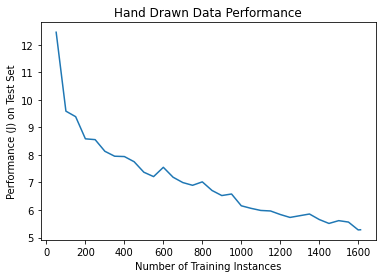

In [149]:
dig_j,dig_count = nn.k_fold(dig_fold,dig_vals,[[64,128,10]],0.1,0.0001,5,50,get_j=True)
plt.plot(dig_count,dig_j)
plt.xlabel('Number of Training Instances')
plt.ylabel('Performance (J) on Test Set')
plt.title('Hand Drawn Data Performance')
plt.show()

Briefly discuss and interpret these graphs

> This graph shows a clear downward trend in cost as the number of training instances increase, which is to be expected of neural networks.

### 2. K-NN

In [29]:
def test_decision_knn(train_set,test_set,vals,k_vals,fold_metrics):
    test_copy = pd.DataFrame(test_set,copy=True)
    #train_copy = pd.DataFrame(train_set,copy=True)
    to_guess = test_copy.drop('class',axis=1)
    #to_train = train_copy.drop('class',axis=1)
    predictions = pd.DataFrame(to_guess.apply(lambda row: knn(k_vals,train_set,row), axis=1),columns=['predicted'])
    predictions['actual'] = test_set.loc[predictions.index,'class']

    for i in range(len(k_vals)):
        prec,rec,f1 = [0,0,0]
        for val in vals:
            is_targ = predictions[predictions.predicted.apply(lambda x: x[i] == val)]
            not_targ = predictions[predictions.predicted.apply(lambda x: x[i] != val)]
            tp = len(is_targ[is_targ['predicted'].str[i] == is_targ['actual']])
            fp = len(is_targ[is_targ['predicted'].str[i] != is_targ['actual']])
            fn = len(not_targ[not_targ.actual.apply(lambda x: x == val)])
            tn = len(not_targ[not_targ.actual.apply(lambda x: x != val)])
            this_prec = (tp/(tp+fp)) if (tp+fp) > 0 else 0
            this_rec = (tp/(tp+fn)) if (tp+fn) > 0 else 0
            f1 += (this_prec*this_rec*2)/(this_rec+this_prec) if (this_rec+this_prec) > 0 else 0
            prec += this_prec
            rec += this_rec

        avg_f1 = f1/len(vals)
        accuracy = len(predictions[predictions['predicted'].str[i] == predictions['actual']])/len(test_set)
        fold_metrics[k_vals[i]].append((accuracy,avg_f1))
    #return accuracy,avg_f1

def knn(k_vals,data,instance):
        out = []
        distances = data.apply(lambda row: math.dist(row.drop('class'),instance), axis=1)
        sorted_dist = distances.sort_values()
        for k in k_vals:
            #get k closest instances (including the input instance)
            k_neighbors = sorted_dist[:k]
            #get class value with largest number of occurences
            #predicted_class = data.loc[k_neighbors.index,['class']]['class'].mode()[0]
            out.append(data.loc[k_neighbors.index,['class']]['class'].mode()[0])
            #predicted_class = k_neighbors['class'].mode()[0]
        return out


np.random.seed(1)
k = 10
#function to do cross fold validation
def k_fold_jnn(fold,vals,j_vals):
    fold_metrics = defaultdict(list)
    #iterate through folds, taking turns being test fold
    for i in range(k):
        test_fold = fold[i]
        #test_targs = test_fold['class']
        #test_feat = test_fold.drop('class',axis=1)
        train_fold = fold[0:i]
        train_fold.extend(fold[i+1:len(fold)])
        train_data = pd.concat(train_fold)
        test_decision_knn(train_data,test_fold,vals,j_vals,fold_metrics)
            
    return fold_metrics

def dig_test_knn(dig_fold,dig_vals,j_vals):
    knn_res = k_fold_jnn(dig_fold,dig_vals,j_vals)
    j_dict = defaultdict(list)

    for j,perf in knn_res.items():
        avg_acc,avg_f1 = [0,0]
        for res in perf:
            avg_acc += res[0]
            avg_f1 += res[1]
        j_dict['Num Neighbors'].append(j)
        j_dict['Accuracy'].append(avg_acc/10)
        j_dict['F1'].append(avg_f1/10)

    j_table = pd.DataFrame(j_dict)
    print(j_table)
    return knn_res

In [6]:
digits = datasets.load_digits(as_frame=True)
dig_df = digits['data']
dig_df['class'] = digits['target']
dig_df = (dig_df - dig_df.min()) / (dig_df.max() - dig_df.min())
dig_df.fillna(0,inplace=True)
dig_class_0 = dig_df.loc[dig_df['class'] == 0].sample(frac=1)
dg0_split =  np.array_split(dig_class_0,k)
dig_class_1 = dig_df.loc[dig_df['class'] == 1/9].sample(frac=1)
dg1_split =  np.array_split(dig_class_1,k)
dig_class_2 = dig_df.loc[dig_df['class'] == 2/9].sample(frac=1)
dg2_split =  np.array_split(dig_class_2,k)
dig_class_3 = dig_df.loc[dig_df['class'] == 3/9].sample(frac=1)
dg3_split =  np.array_split(dig_class_3,k)
dig_class_4 = dig_df.loc[dig_df['class'] == 4/9].sample(frac=1)
dg4_split =  np.array_split(dig_class_4,k)
dig_class_5 = dig_df.loc[dig_df['class'] == 5/9].sample(frac=1)
dg5_split =  np.array_split(dig_class_5,k)
dig_class_6 = dig_df.loc[dig_df['class'] == 6/9].sample(frac=1)
dg6_split =  np.array_split(dig_class_6,k)
dig_class_7 = dig_df.loc[dig_df['class'] == 7/9].sample(frac=1)
dg7_split =  np.array_split(dig_class_7,k)
dig_class_8 = dig_df.loc[dig_df['class'] == 8/9].sample(frac=1)
dg8_split =  np.array_split(dig_class_8,k)
dig_class_9 = dig_df.loc[dig_df['class'] == 9/9].sample(frac=1)
dg9_split =  np.array_split(dig_class_9,k)

dig_vals = [0,1/9,2/9,3/9,4/9,5/9,6/9,7/9,8/9,9/9]
#list to hold folds
dig_fold = []
for i in range(k):
    this_fold = [dg0_split[i],dg1_split[i],dg2_split[i],dg3_split[i],dg4_split[i],dg5_split[i],dg6_split[i],dg7_split[i],dg8_split[i],dg9_split[i]]
    dig_fold.append(pd.concat(this_fold))


**2.3** To obtain the best performance possible, you should carefully adjust the hyper-parameters of each
algorithm when deployed on a dataset

In [30]:
j_vals = [1,10,20,30,40,50,60,70,80,90,100]
j_res = dig_test_knn(dig_fold,dig_vals,j_vals)

    Num Neighbors  Accuracy        F1
0               1  0.986578  0.986543
1              10  0.983294  0.983319
2              20  0.977175  0.976962
3              30  0.966028  0.965733
4              40  0.961546  0.961062
5              50  0.952601  0.952120
6              60  0.944879  0.944565
7              70  0.939832  0.939233
8              80  0.932074  0.931231
9              90  0.931525  0.930757
10            100  0.926557  0.925694


**2.4** After analyzing the performance of each algorithm under different hyper-parameters,
identify the best hyper-parameter setting

> From testing, using low number of neighbors yielded the best results, showing a clear decrease in accuracy as the value of K increased. The best hyper-parameter setting to use we identified was K = 1

**2.5** For each dataset, and considering the best hyper-parameter setting for each selected algorithm, construct
relevant learning curves and/or graphs

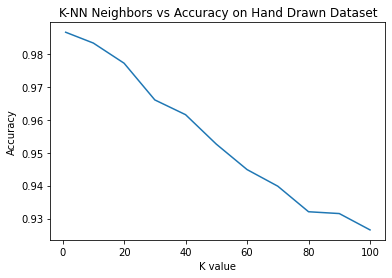

In [31]:
j_vals = []
j_acc = []
for j,perf in j_res.items():
    avg_acc,avg_f1 = [0,0]
    for res in perf:
        avg_acc += res[0]
        avg_f1 += res[1]
    j_acc.append(avg_acc/10)
    j_vals.append(j)

plt.plot(j_vals,j_acc)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K-NN Neighbors vs Accuracy on Hand Drawn Dataset")
plt.show()

Briefly discuss and interpret these graphs

> This graph shows a clear downward accuracy as K increases. K-NN peformed very well on this dataset, which is likely due to the nature of how hand drawn numbers are stored; since each instance represents pixel values in the drawn image, we would expect that the training data point closest to our test instance in terms of euclidean distance is in fact the expected output.


## Titanic Dataset

**Models Used:**
- Naive Bayes
- Decision tree

## Loan Eligibility Prediction Dataset

**Models Used:**
- Random Forests
- KNN

## Oxford Parkingson's Disease Detection

**Models Used:**
- Neural Networks
- Random Forest